In [41]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/walmart-dataset/Walmart.csv


In [42]:
#essa é uma versão preparada do arquivo encontrado nesta rota
#https://www.itau.com.br/relacoes-com-investidores/resultados-e-relatorios/central-de-resultados/
#/kaggle/input/alterada-itau-planilha-de-sries-histricas-3t23/alterada_ITAU_Planilha de Sries Histricas 3T23.xlsx

In [43]:

import matplotlib.pyplot as plt

In [44]:
!pip install -U statsmodels

In [45]:
!pip install pmdarima

In [46]:
df_temp = pd.read_csv('/kaggle/input/walmart-dataset/Walmart.csv') # train set


In [47]:
df_temp

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.900,0,42.310,2.572,211.096,8.106
1,1,12-02-2010,1641957.440,1,38.510,2.548,211.242,8.106
2,1,19-02-2010,1611968.170,0,39.930,2.514,211.289,8.106
3,1,26-02-2010,1409727.590,0,46.630,2.561,211.320,8.106
4,1,05-03-2010,1554806.680,0,46.500,2.625,211.350,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.950,0,64.880,3.997,192.014,8.684
6431,45,05-10-2012,733455.070,0,64.890,3.985,192.170,8.667
6432,45,12-10-2012,734464.360,0,54.470,4.000,192.327,8.667
6433,45,19-10-2012,718125.530,0,56.470,3.969,192.331,8.667


In [48]:
display(df_temp.describe())

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000,6435.000
mean,23.000,1046964.878,0.070,60.664,3.359,171.578,7.999
std,12.988,564366.622,0.255,18.445,0.459,39.357,1.876
min,1.000,209986.250,0.000,-2.060,2.472,126.064,3.879
25%,12.000,553350.105,0.000,47.460,2.933,131.735,6.891
50%,23.000,960746.040,0.000,62.670,3.445,182.617,7.874
75%,34.000,1420158.660,0.000,74.940,3.735,212.743,8.622
max,45.000,3818686.450,1.000,100.140,4.468,227.233,14.313


In [49]:
df_temp = df_temp.fillna(0) # filling null's with 0

In [50]:
from datetime import datetime
df_temp['Date'] = pd.to_datetime(df_temp['Date'], format='%d-%m-%Y')
df_temp['month'] =df_temp['Date'].dt.month 
df_temp['year'] =df_temp['Date'].dt.year


In [51]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df_temp.groupby(['Store', 'month'])['Weekly_Sales'].mean() 

Store  month
1      1       1400467.686
       2       1625442.215
       3       1567743.605
       4       1544510.024
       5       1542111.075
                   ...    
45     8        736108.122
       9        723761.879
       10       737608.745
       11       877810.219
       12      1067003.274
Name: Weekly_Sales, Length: 540, dtype: float64

In [52]:
df_temp.query("Store == 1").groupby(['Store', 'year'])['Weekly_Sales'].count()

Store  year
1      2010    48
       2011    52
       2012    43
Name: Weekly_Sales, dtype: int64

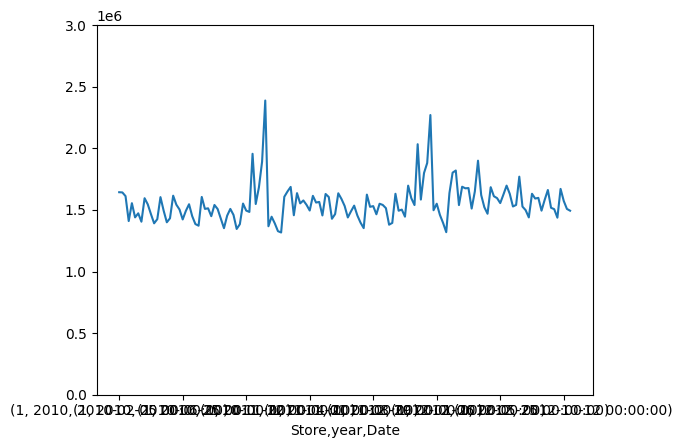

In [53]:
df_temp.query("Store == 1").groupby(['Store', 'year','Date' ])['Weekly_Sales'].mean().plot(ylim=(0, 3000000)) ;

In [54]:
temp = pd.pivot_table(df_temp, values = "Weekly_Sales", index= ['Date', 'Store'])


In [55]:
temp = df_temp.pivot(index='Date', columns='Store', values='Weekly_Sales')

In [56]:
df = temp
df[1]

Date
2010-02-05   1643690.900
2010-02-12   1641957.440
2010-02-19   1611968.170
2010-02-26   1409727.590
2010-03-05   1554806.680
                 ...    
2012-09-28   1437059.260
2012-10-05   1670785.970
2012-10-12   1573072.810
2012-10-19   1508068.770
2012-10-26   1493659.740
Name: 1, Length: 143, dtype: float64

In [57]:
df

Store,1,2,3,4,5,6,7,8,9,10,...,36,37,38,39,40,41,42,43,44,45
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1643690.900,2136989.460,461622.220,2135143.870,317173.100,1652635.100,496725.440,1004137.090,549505.550,2193048.750,...,467546.740,536006.730,358496.140,1230596.800,1001943.800,1086533.180,543384.010,647029.280,281090.950,890689.510
2010-02-12,1641957.440,2137809.500,420728.960,2188307.390,311825.700,1606283.860,524104.920,994801.400,552677.480,2176028.520,...,469563.700,529852.700,342214.900,1266229.070,955338.290,1075656.340,575709.960,682918.990,286857.130,656988.640
2010-02-19,1611968.170,2124451.540,421642.190,2049860.260,303447.570,1567138.070,506760.540,963960.370,511327.900,2113432.580,...,470281.030,510382.500,327237.920,1230591.970,916289.200,1052034.740,508794.870,658997.550,267956.300,841264.040
2010-02-26,1409727.590,1865097.270,407204.860,1925728.840,270281.630,1432953.210,496083.240,847592.110,473773.270,2006774.960,...,447519.440,513615.820,334222.730,1168582.020,863917.410,991941.730,491510.580,618702.790,273079.070,741891.650
2010-03-05,1554806.680,1991013.130,415202.040,1971057.440,288855.710,1601348.820,491419.550,881503.950,507297.880,1987090.090,...,480203.430,519255.680,372239.890,1266254.210,990152.280,1063557.490,554972.420,658600.050,284617.270,777951.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,1437059.260,1746470.560,389813.020,2027620.230,310141.680,1369131.460,525545.760,884724.410,516361.060,1694862.410,...,270677.980,527953.140,398468.080,1495607.070,919595.440,1307928.010,505978.460,577792.320,355307.940,713173.950
2012-10-05,1670785.970,1998321.040,443557.650,2209835.430,343048.290,1518177.710,505830.560,976436.020,606755.300,1758971.380,...,277137.860,546122.370,458479.010,1574408.670,1069112.000,1400160.950,593162.530,642614.890,337390.440,733455.070
2012-10-12,1573072.810,1900745.130,410804.390,2133026.070,325345.410,1459396.840,503463.930,927511.990,558464.800,1713889.110,...,300236.850,521810.750,437320.660,1494417.070,982523.260,1409544.970,612379.900,619369.720,337796.130,734464.360


In [58]:
split = int (0.7*len(df))
Ntest = len(df)-split
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]
len(df)-split

43

In [59]:
import pmdarima as pm

Column Name :  1
Column Name : 1 Has 0 Suspects 
Column Name :  2
Column Name : 2 Has 0 Suspects 
Column Name :  3
Column Name : 3 Has 0 Suspects 
Column Name :  4
Column Name : 4 Has 1 Suspects 
Column Name :  5
Column Name : 5 Has 0 Suspects 
Column Name :  6
Column Name : 6 Has 1 Suspects 
Column Name :  7
Column Name : 7 Has 2 Suspects 
Column Name :  8
Column Name : 8 Has 0 Suspects 
Column Name :  9
Column Name : 9 Has 1 Suspects 
Column Name :  10
Column Name : 10 Has 0 Suspects 
Column Name :  11
Column Name : 11 Has 0 Suspects 
Column Name :  12
Column Name : 12 Has 0 Suspects 
Column Name :  13
Column Name : 13 Has 1 Suspects 
Column Name :  14
Column Name : 14 Has 1 Suspects 
Column Name :  15
Column Name : 15 Has 1 Suspects 
Column Name :  16
Column Name : 16 Has 1 Suspects 
Column Name :  17
Column Name : 17 Has 0 Suspects 
Column Name :  18
Column Name : 18 Has 0 Suspects 
Column Name :  19
Column Name : 19 Has 0 Suspects 
Column Name :  20
Column Name : 20 Has 0 Suspects

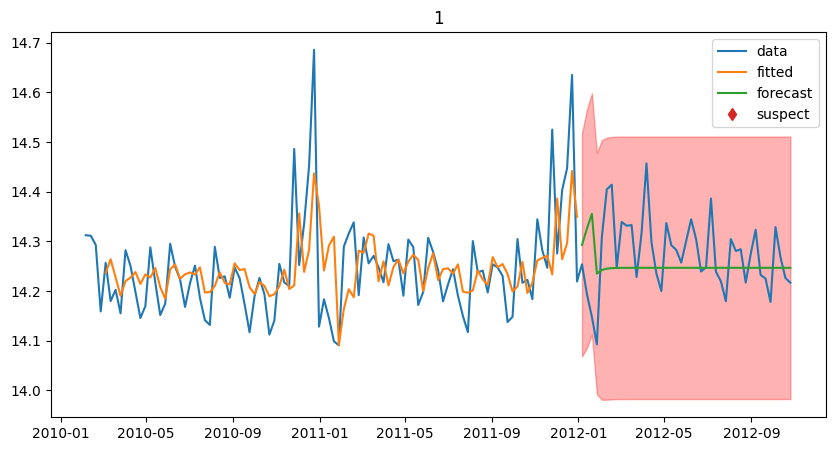

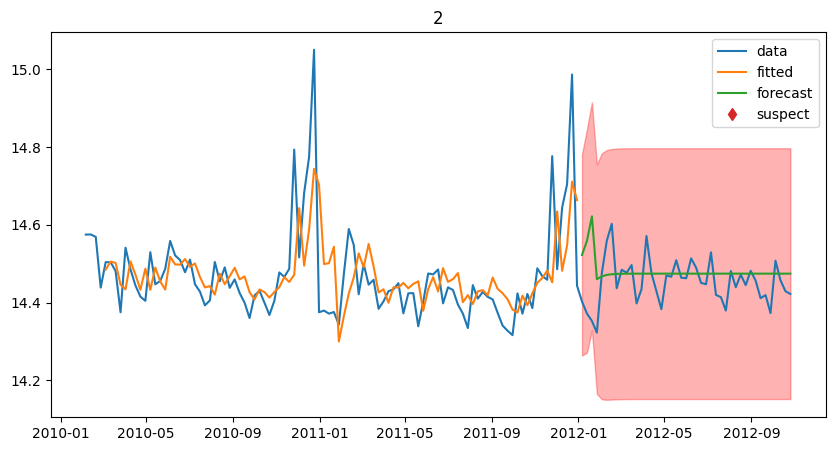

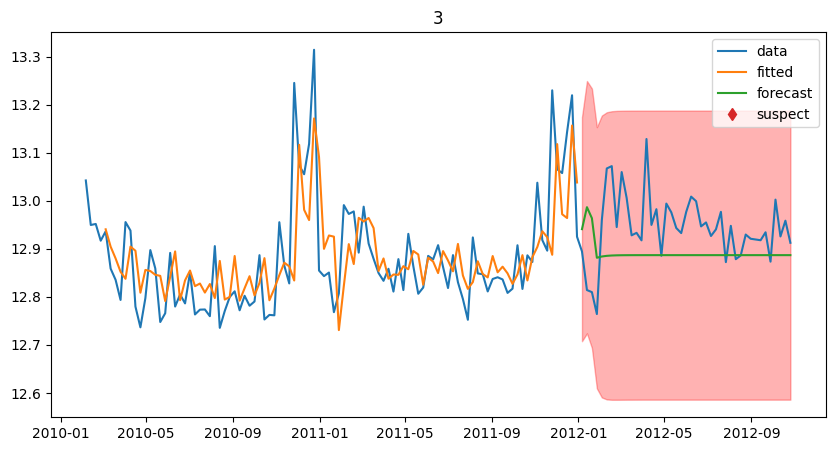

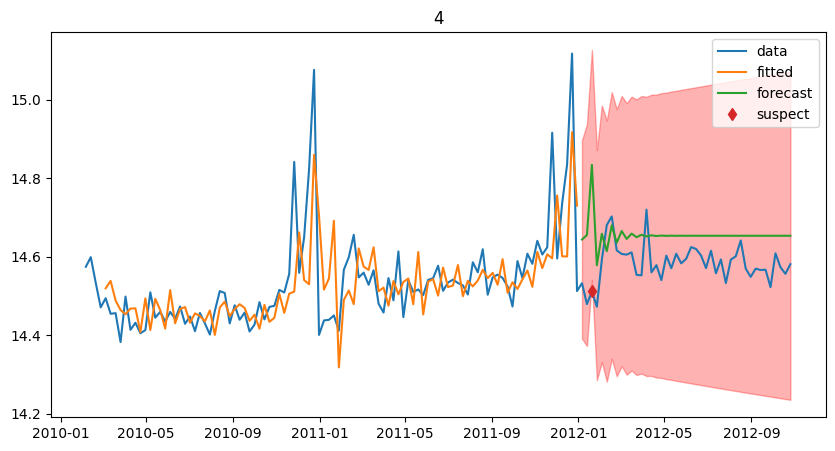

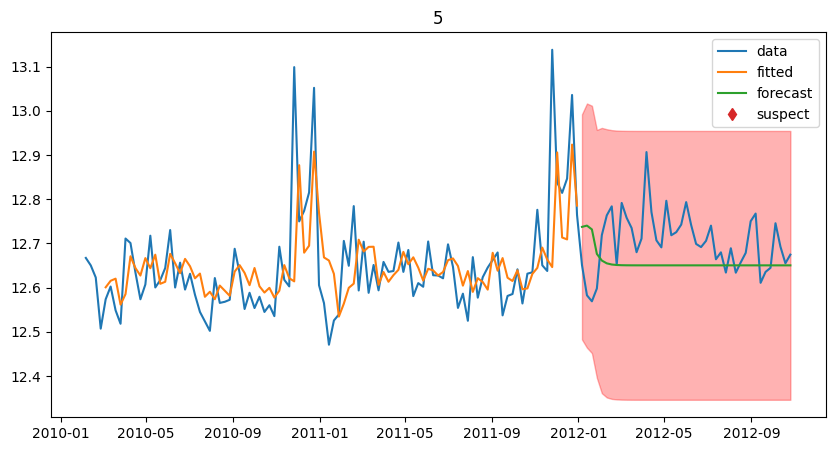

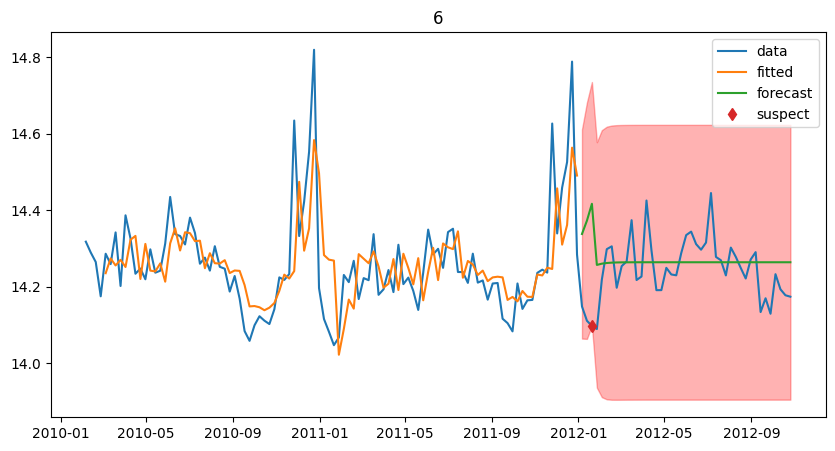

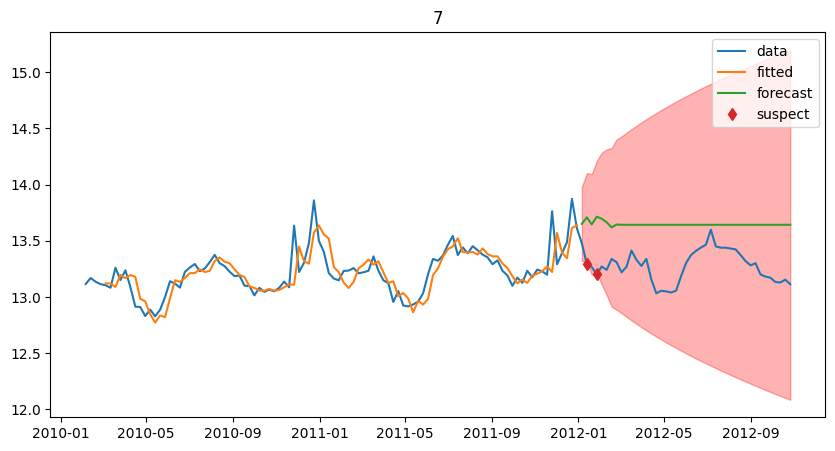

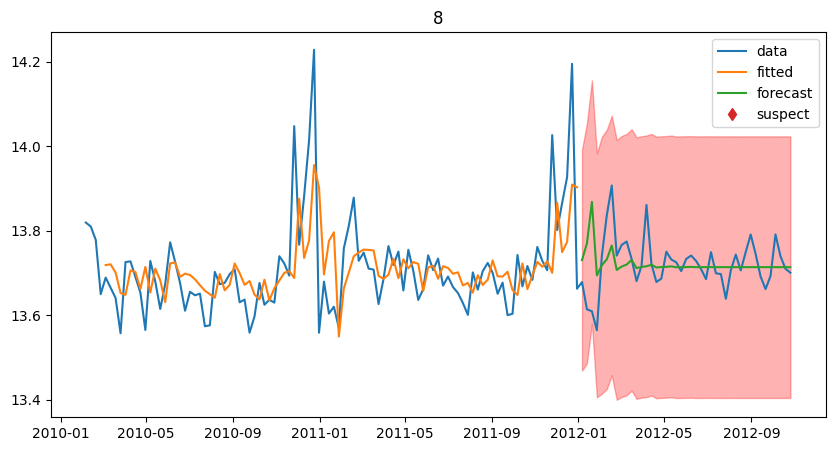

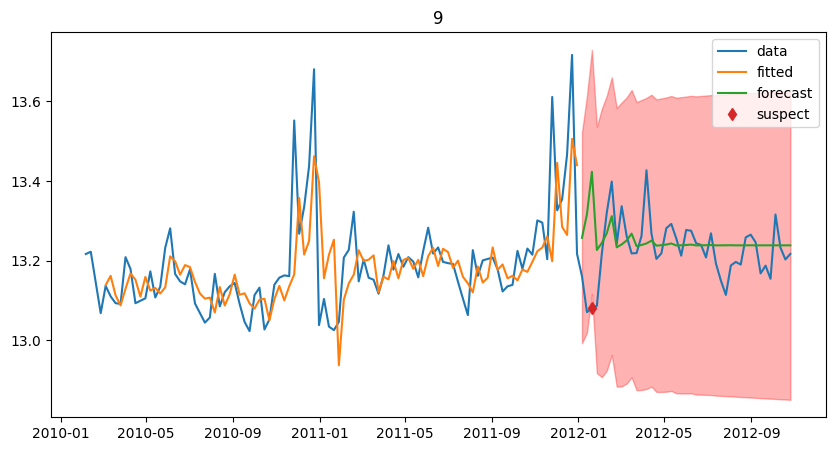

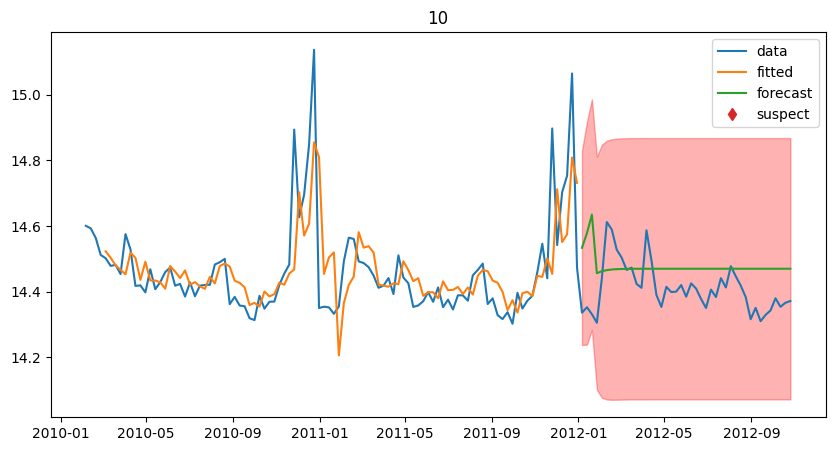

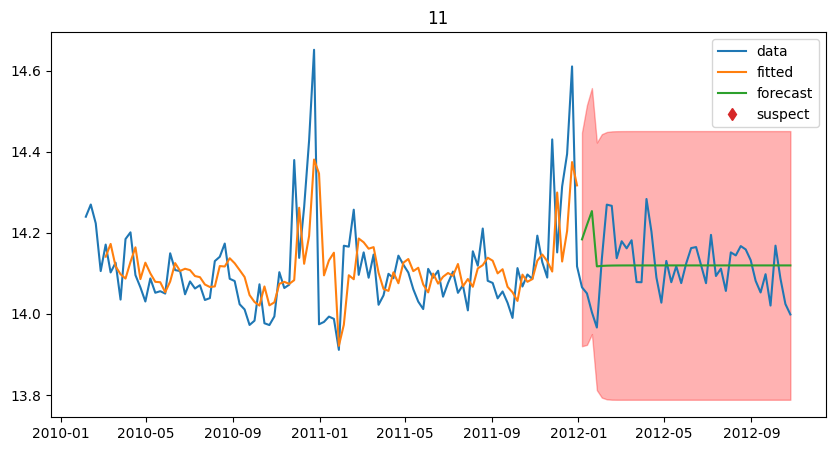

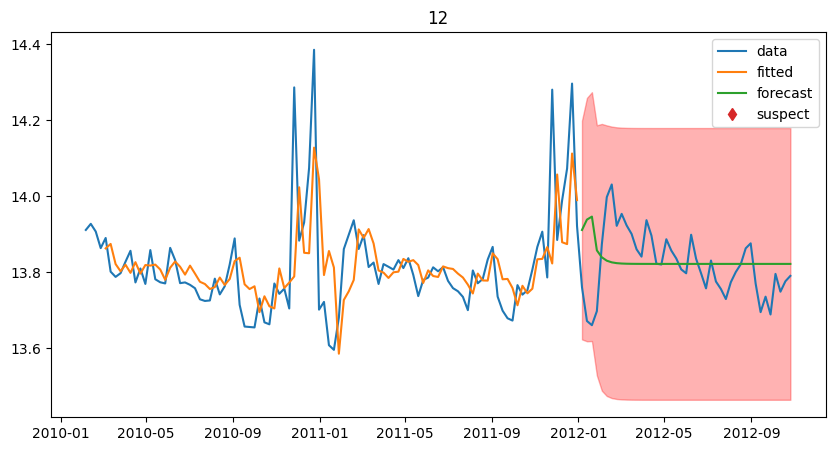

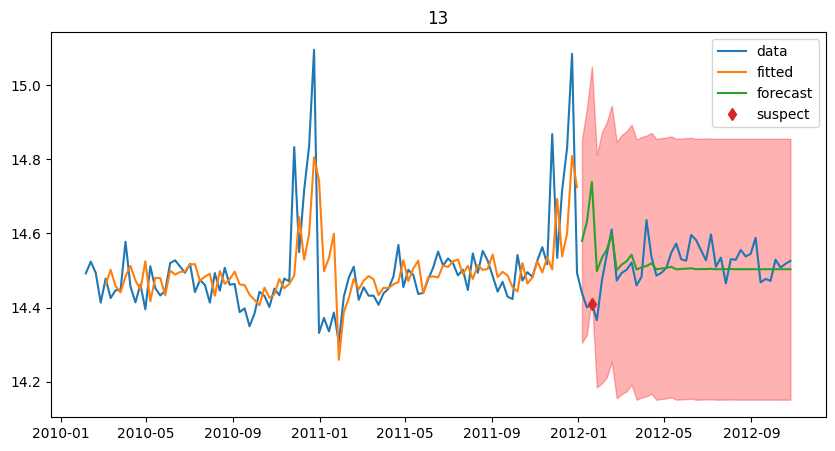

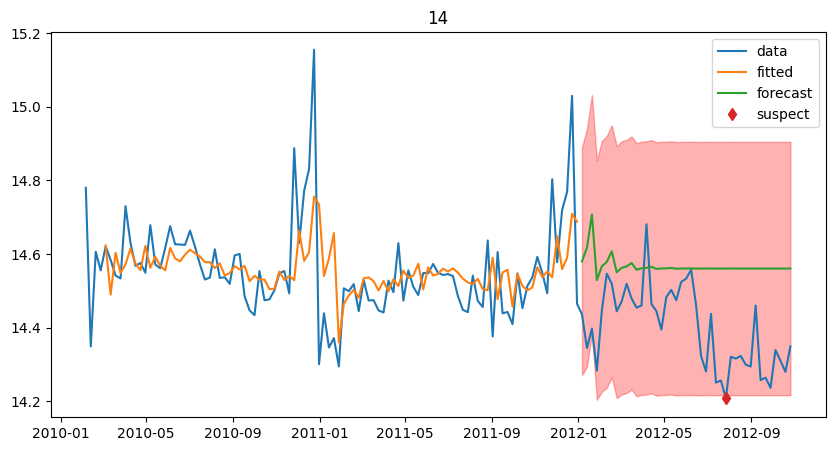

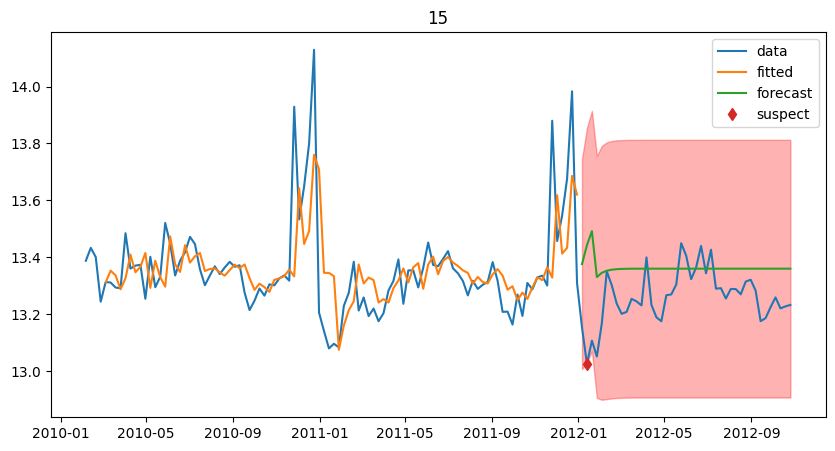

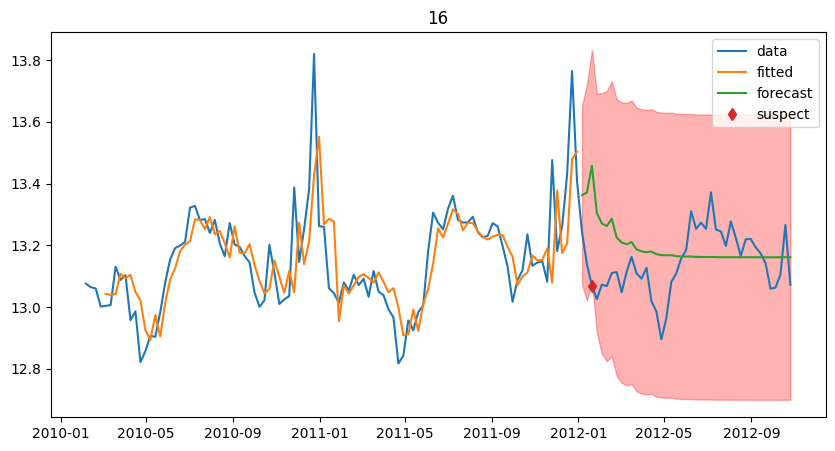

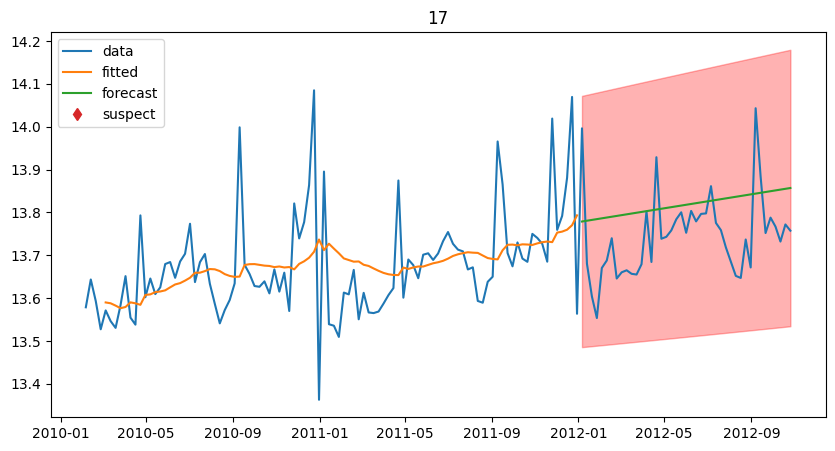

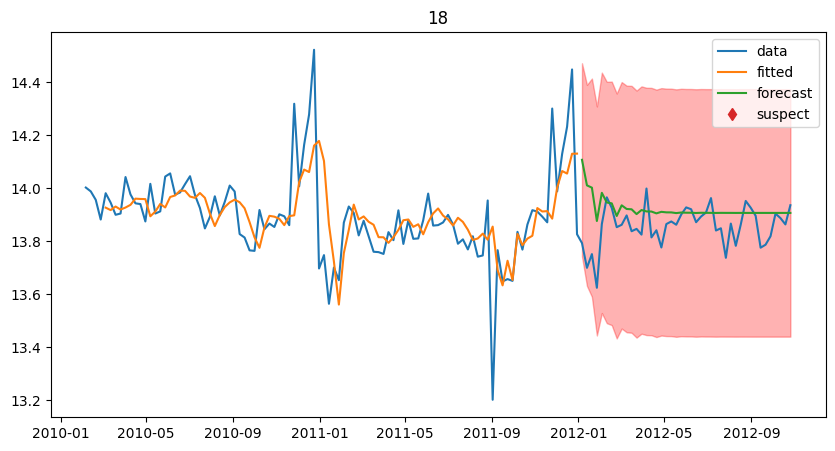

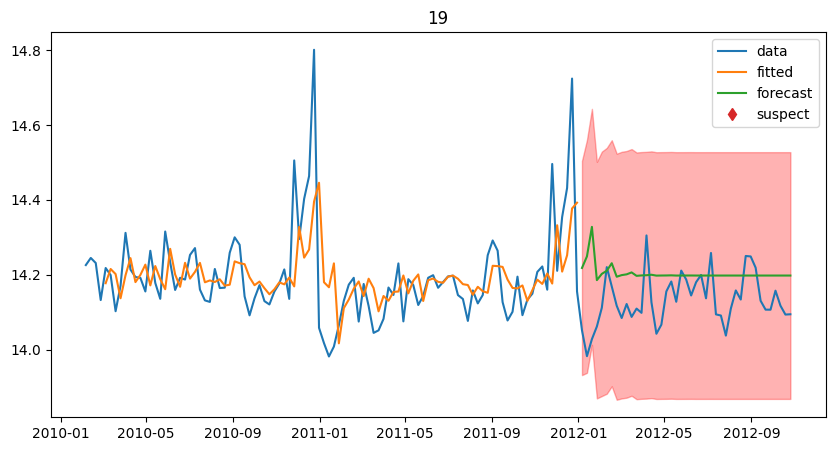

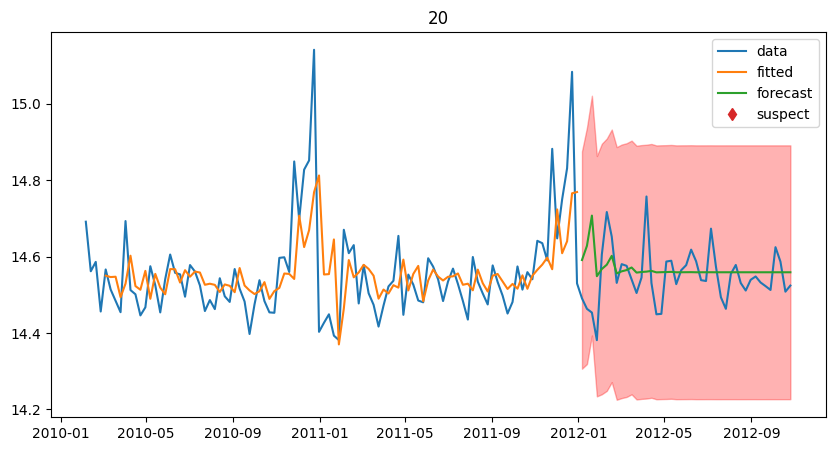

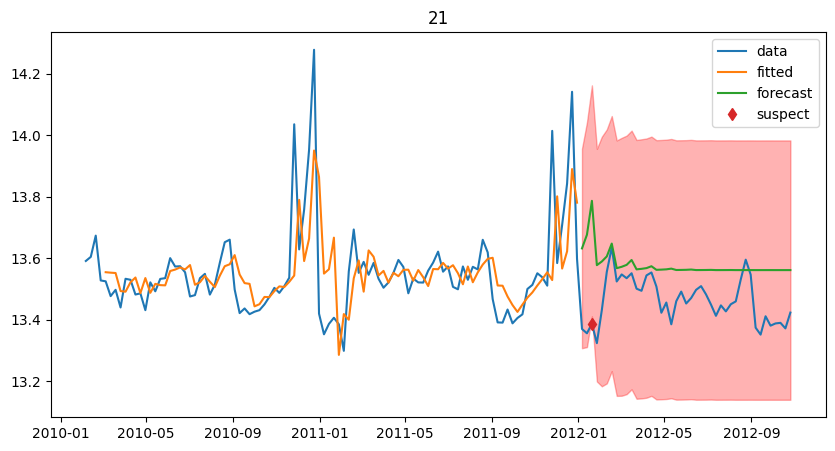

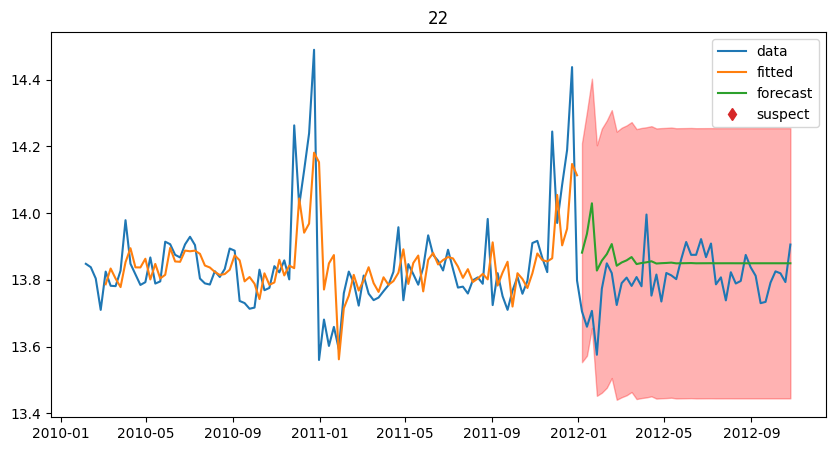

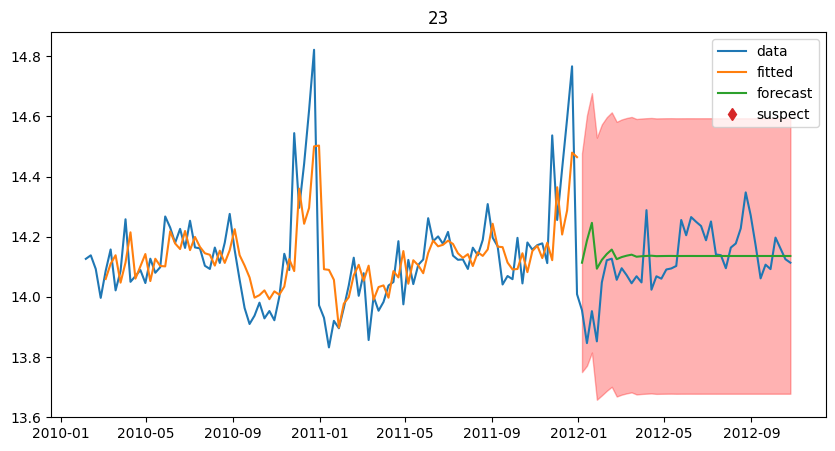

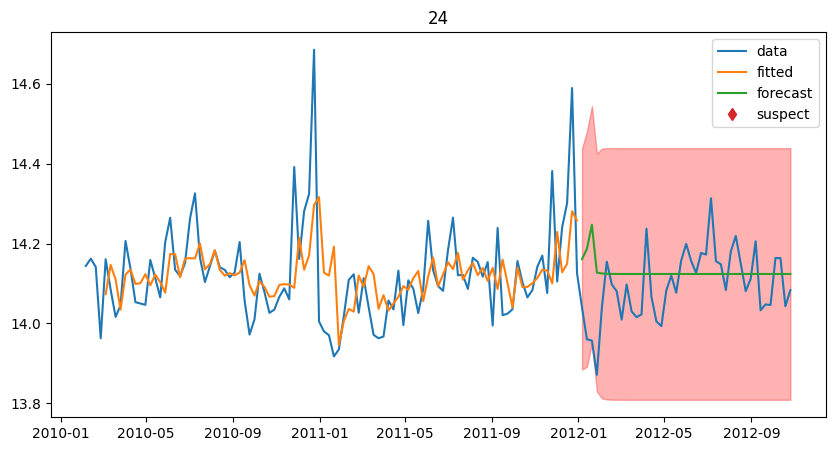

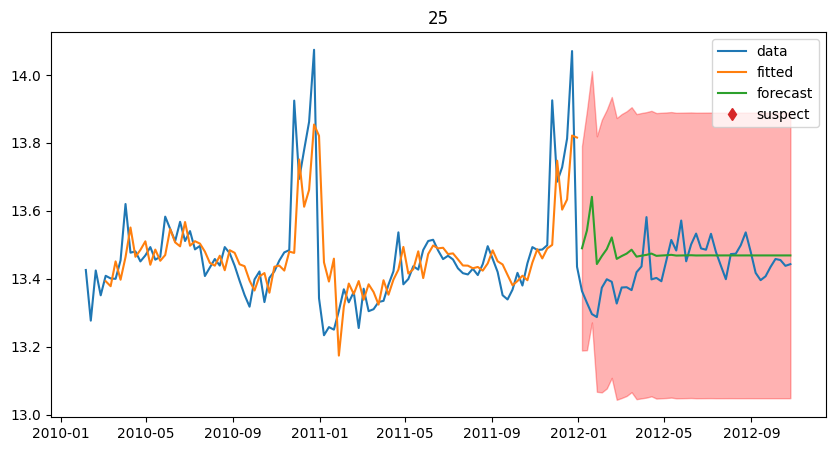

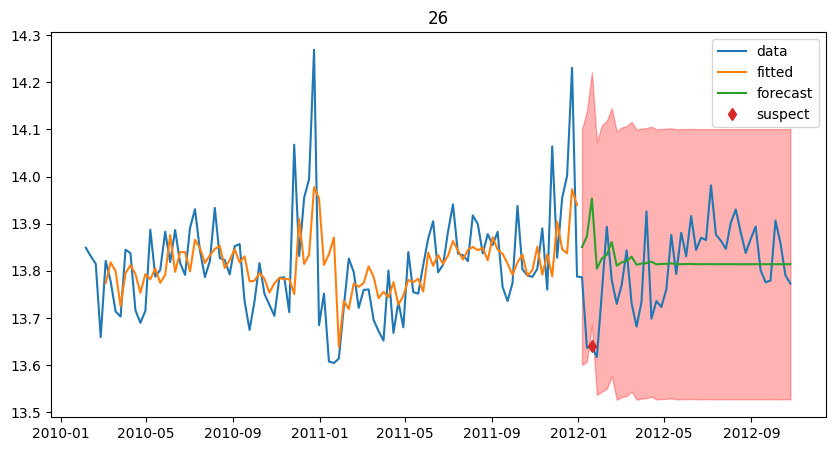

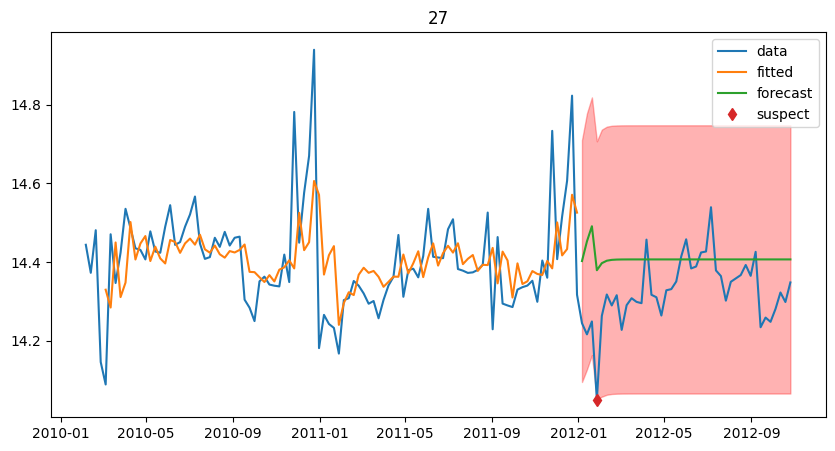

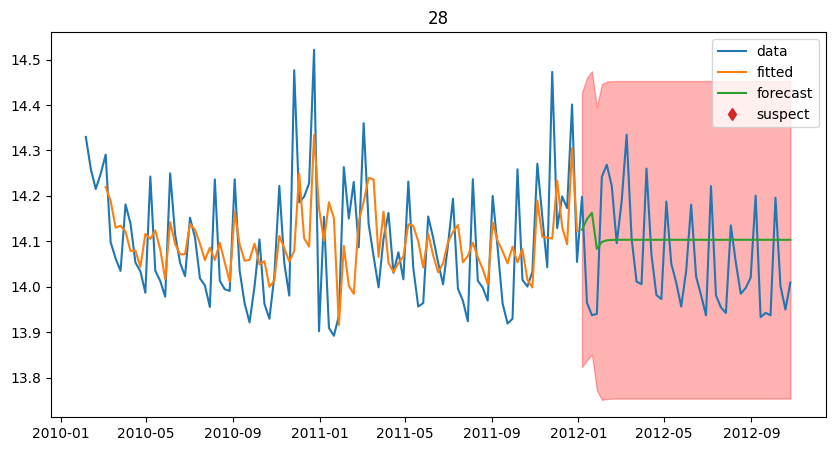

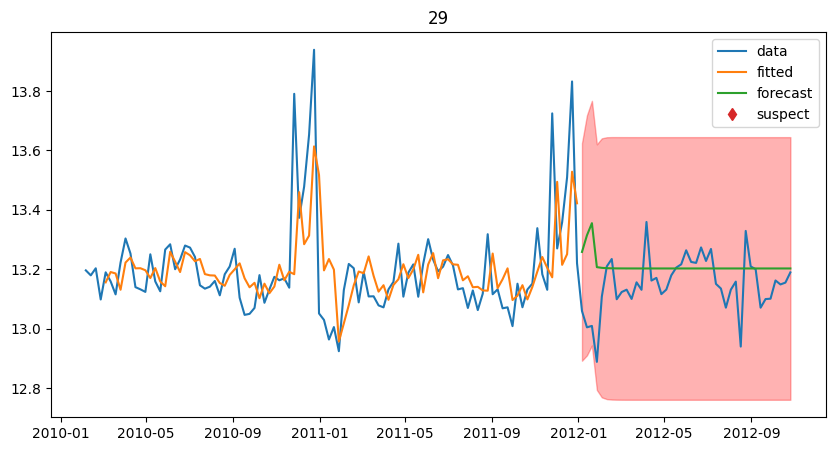

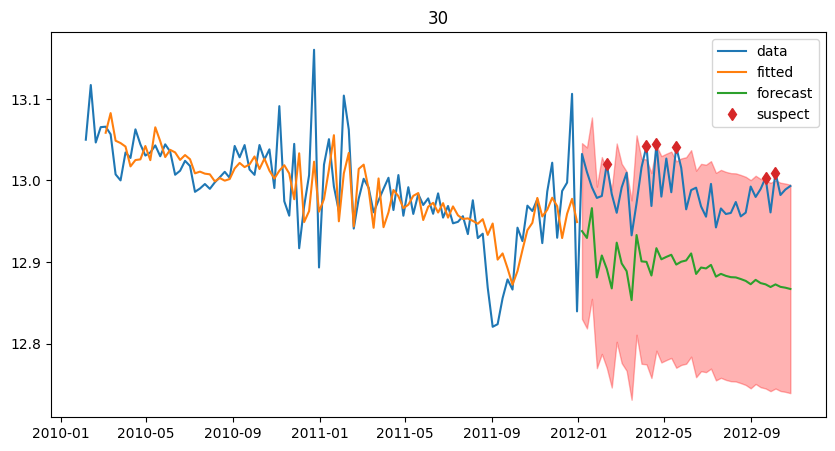

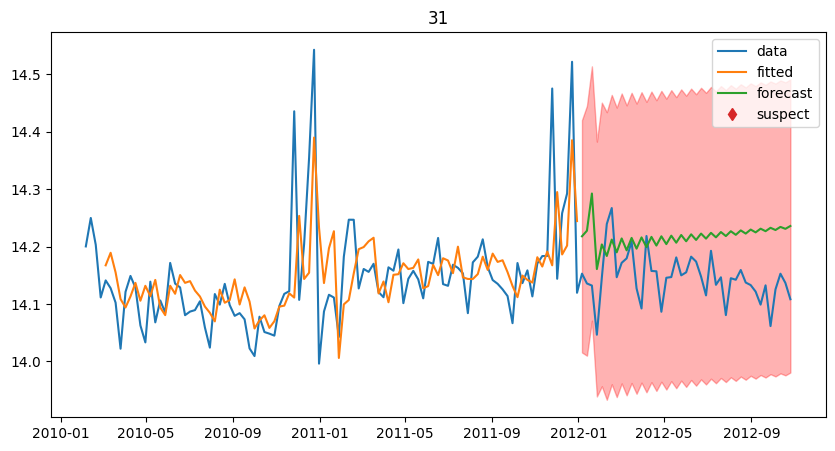

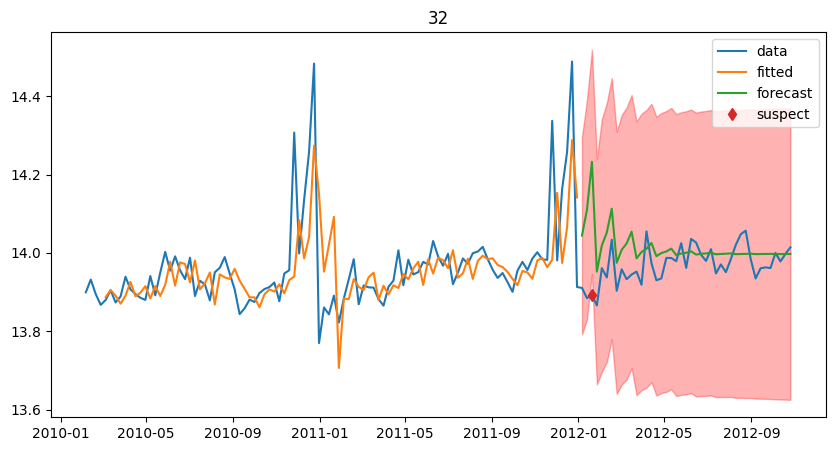

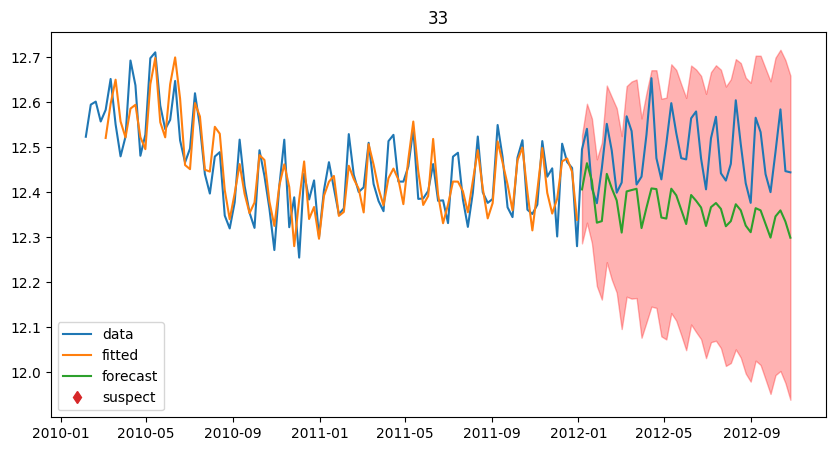

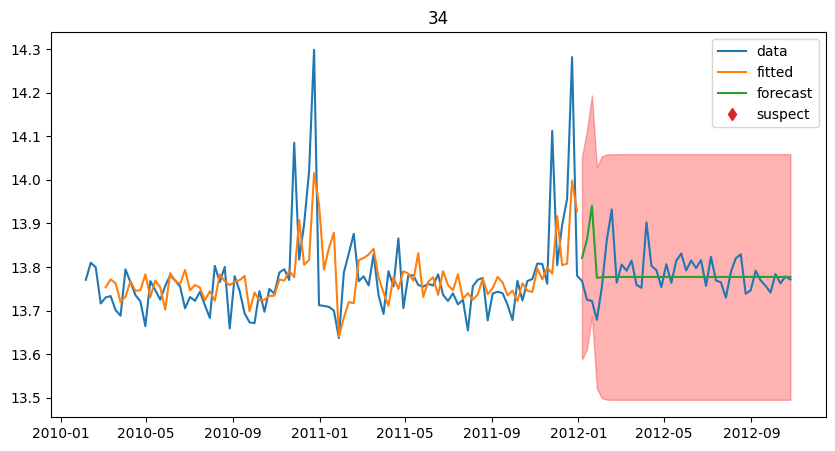

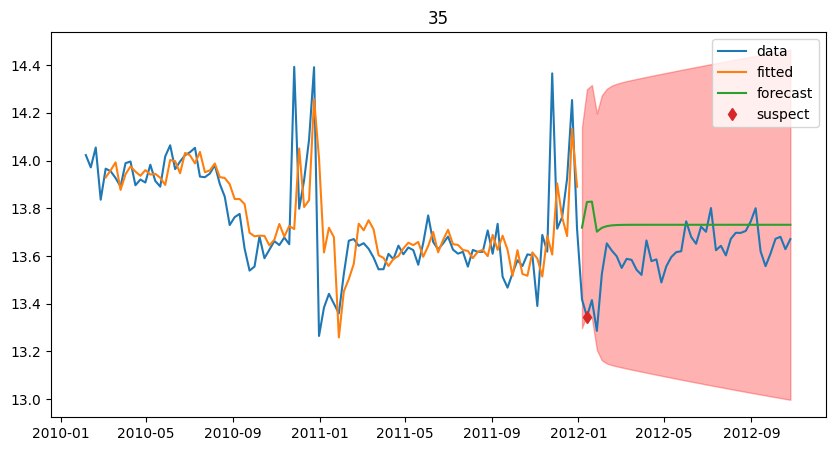

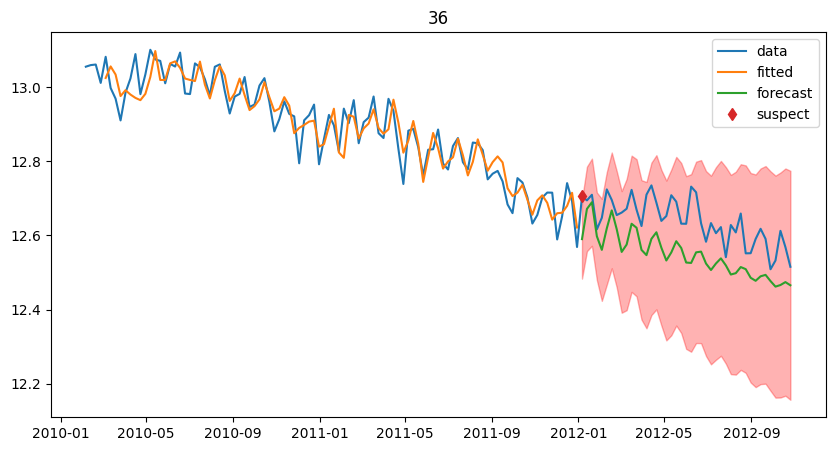

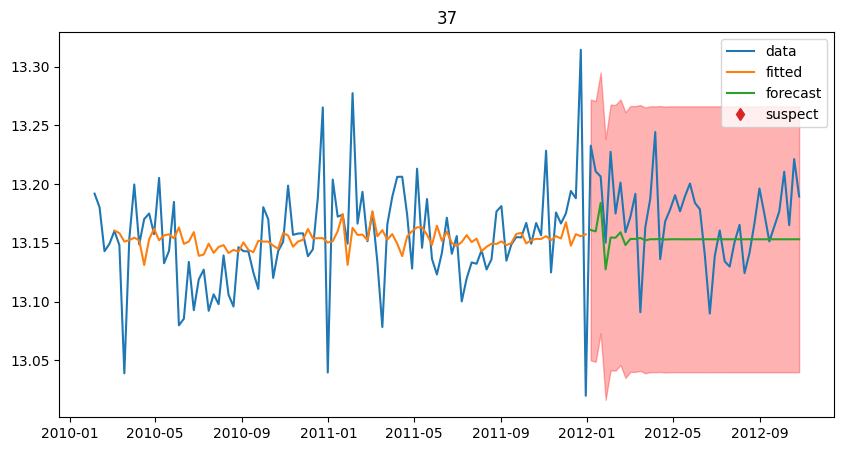

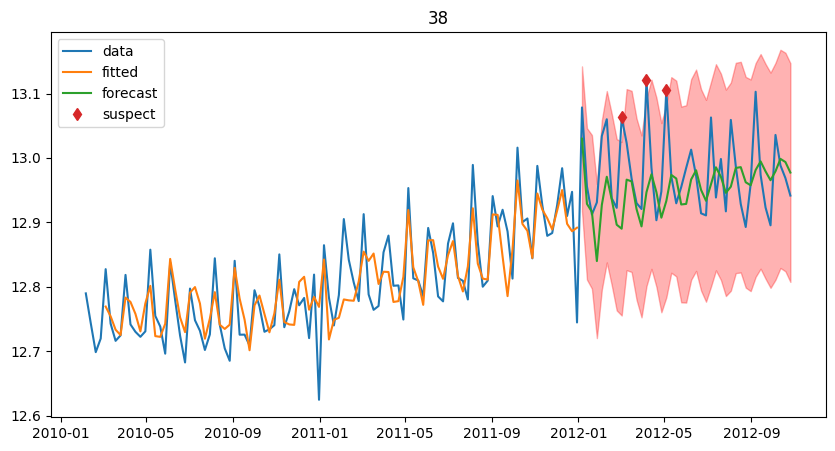

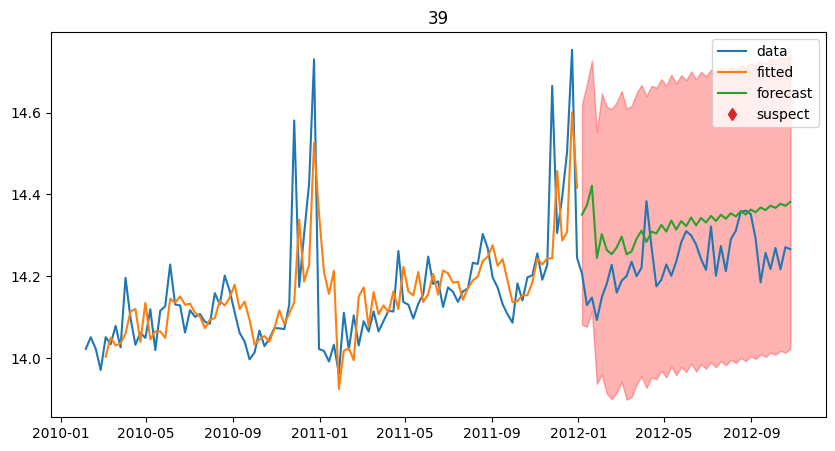

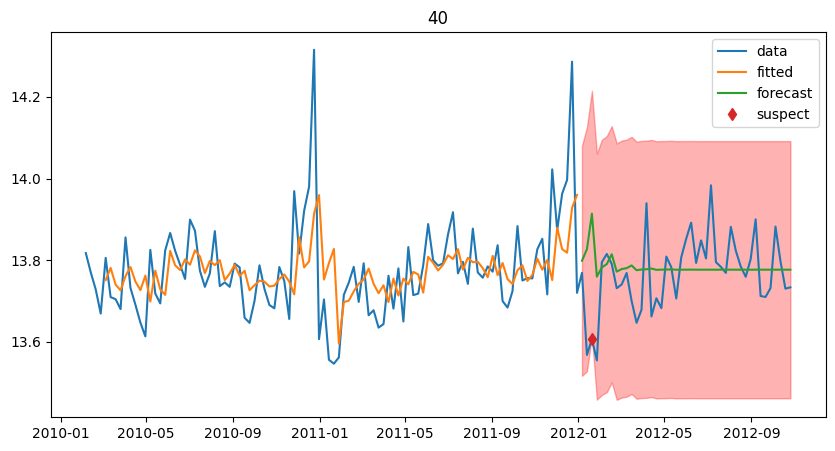

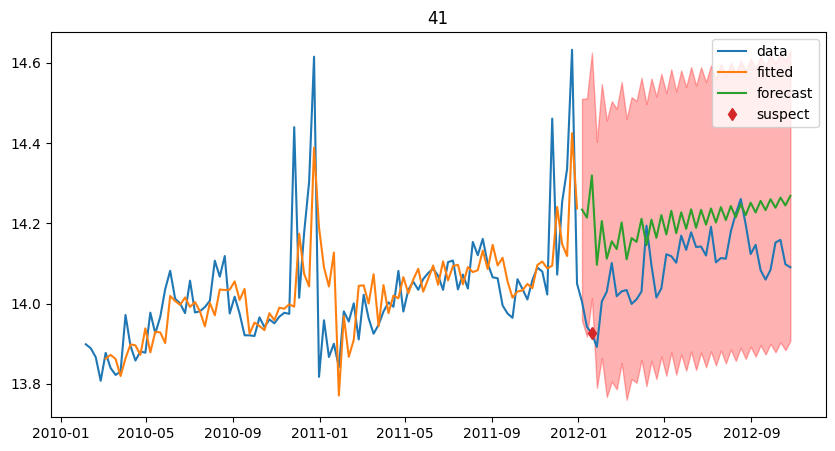

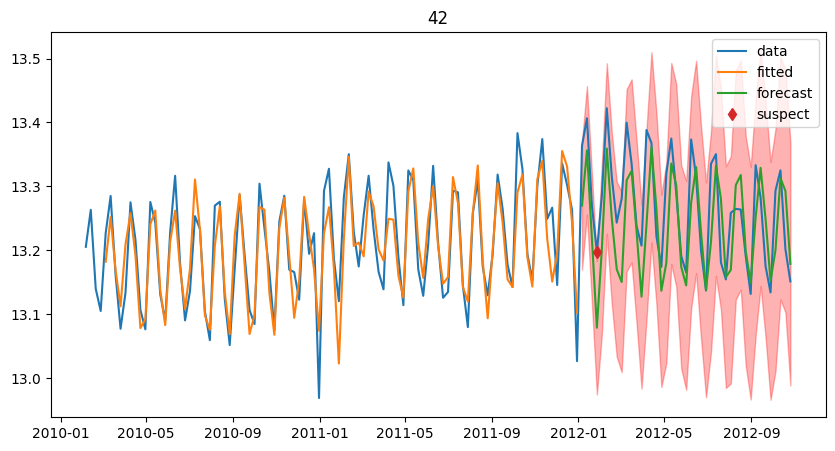

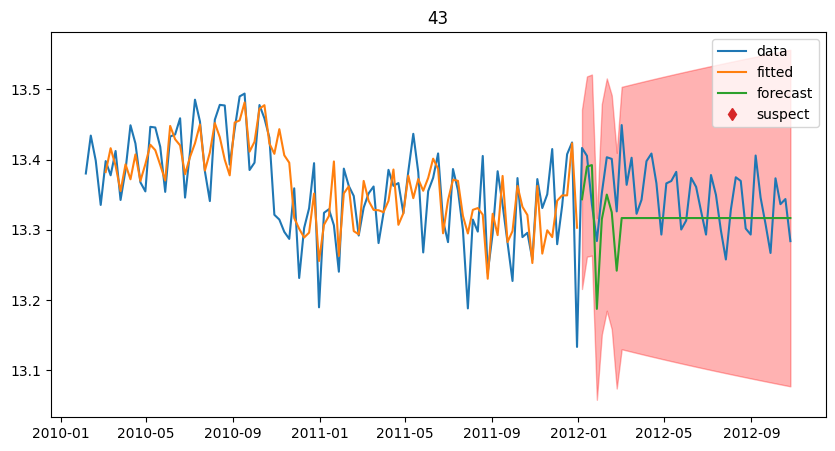

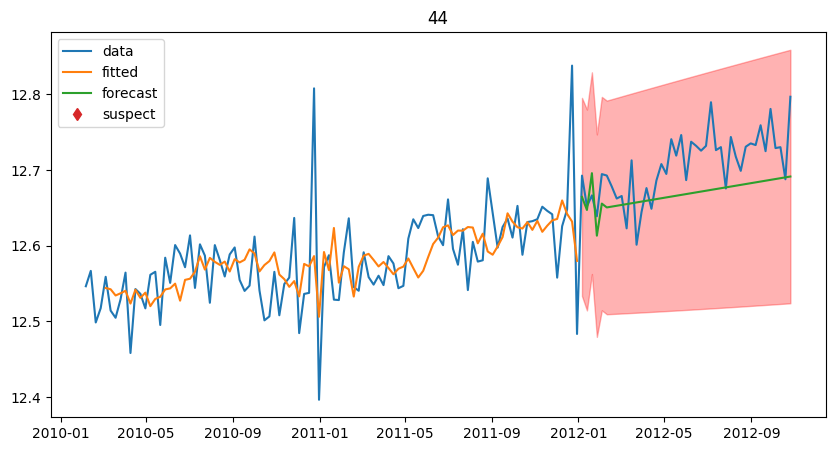

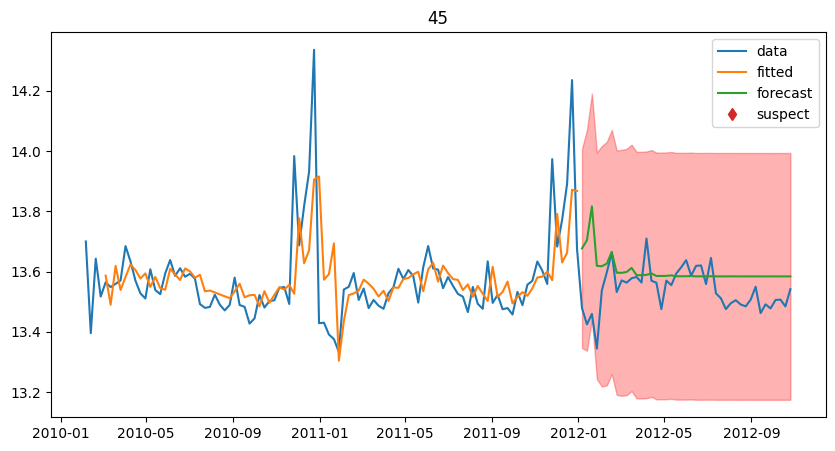

In [60]:
import warnings
warnings.filterwarnings("ignore")
df.replace(np.nan, 0, inplace=True)


for (columnName, columnData) in df.items():
    if (columnName != 'dataLoop'and columnName != 'LogDataLoop' and 
        columnName != 'data' and columnName != 'LogData' and df[columnName].dtypes=='float64'):
        print('Column Name : ', str(columnName))
        #print('Column Type : ', df[columnName].dtypes)
                      
        """"""
        df['dataLoop']=df[columnName]
        df['dataLoop'].replace(0, 0.001, inplace=True)
        df['dataLoop'] = df['dataLoop'].abs()
        
        df['LogDataLoop'] = np.log(df['dataLoop'])
        
        split = int (0.7*len(df))
        Ntest = len(df)-split
        train = df.iloc[:-Ntest]
        test = df.iloc[-Ntest:]
        
        model = pm.auto_arima(train['LogDataLoop'],
                      trace=False,
                      method='bfgs', 
                      suppress_warnings=True,
                      seasonal=True, m=4)
        
        
        train_pred = model.predict_in_sample(start=4, end=-1)
        test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True,alpha=0.01)

        
        df_diff_upper=[]
        df_diff_lower=[]
        df_diff_pred_data=[]

        negatives=[]
        j = 0
        for i in df['LogDataLoop'].iloc[-Ntest:]:
            #upper 0
            df_diff_upper.append(confint[j,1] - i)
            if (confint[j,1] - i)<0:
                negatives.append(j)
            j += 1


        j = 0
        for i in df['LogDataLoop'].iloc[-Ntest:]:
            #upper 0
            df_diff_lower.append(i-confint[j,0])
            if (i-confint[j,0])<0:
                negatives.append(j)
            j += 1

        negatives = list( dict.fromkeys(negatives) ) 

        j = 0
        for i in df['LogDataLoop'].iloc[-Ntest:]:
            #pred
            df_diff_pred_data.append(abs(i-test_pred.iloc[j]))
            j += 1

        df_suspect = test_pred.copy()
        df_suspect.values[:] = np.nan

        for i in negatives:
            df_suspect.values[i] = df['LogDataLoop'].iloc[-Ntest:][i]
            
        print('Column Name : '+ str(columnName) + ' Has ' +str(len(negatives))+ ' Suspects ') 
        
        
        train_pred = model.predict_in_sample(start=4, end=-1)
        test_pred, confint = model.predict(n_periods=Ntest, return_conf_int=True,alpha=0.01)

        fig, ax = plt.subplots(figsize=(10, 5))
        #generalizar dataframe de dados
        ax.plot(df.index, df['LogDataLoop'], label='data')
        ax.plot(train.index[4:], train_pred, label='fitted')
        ax.plot(test.index, test_pred, label='forecast')
        ax.plot(test.index, df_suspect, label='suspect', marker='d', linestyle='None')
        ax.fill_between(test.index, \
                        confint[:,0], confint[:,1], \
                        color='red', alpha=0.3)
        ax.set_title(columnName)
        #ax.set_ylim(ymin=0)
        ax.legend();
        
        #print('r2_score : ', r2_score(test['LogDataLoop'], np.exp(test_pred)))
        """"""